In [40]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
from pylab import bone, pcolor, colorbar, plot, show

import sys
sys.path.insert(0, '../SOM-LVQ')
from supervisedSom import supervisedSom
from minisom import MiniSom

In [41]:
data = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y [y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [42]:
len(x_train)

492

In [43]:
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

In [44]:
x_train1 = x_train[0:246]
x_train2 = x_train[246:492]

y_train1 = y_train[0:246]
y_train2 = y_train[246:492]

In [45]:
# Training the SOM
from minisom import MiniSom
som1 = MiniSom(x = 15, y = 15, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train1)
som1.train_random(data = x_train1, num_iteration = 100)

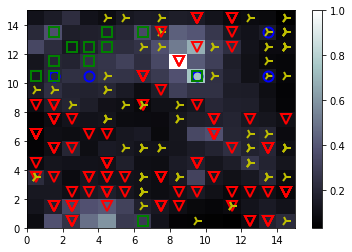

In [46]:
suso1 = supervisedSom(som1, x_train1, y_train1)

label1= suso1.visualSom()

In [47]:
propa1 = suso1.propabilitySom()

taggings1 = suso1.taggingSom()

In [48]:
predicted_y1 = [suso1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94        78
          1       0.96      1.00      0.98        26
          2       0.33      0.14      0.20         7
          3       0.85      0.85      0.85        54

avg / total       0.88      0.90      0.89       165



In [49]:
data_new = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x_new = data_new.iloc[:, 0:6].values
y_new = data_new.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [suso1.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82       558
          1       0.60      0.89      0.71       165
          2       0.00      0.00      0.00       139
          3       0.67      0.56      0.61       453

avg / total       0.62      0.69      0.65      1315



C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
# Training the SOM
from minisom import MiniSom
som2 = MiniSom(x = 15, y = 15, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train2)
som2.train_random(data = x_train2, num_iteration = 100)

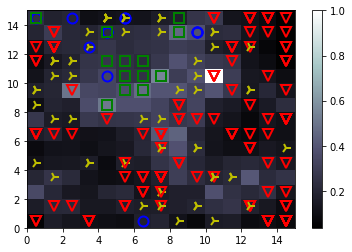

In [51]:
suso2 = supervisedSom(som2, x_train2, y_train2)

label2= suso2.visualSom()

In [52]:
propa2 = suso2.propabilitySom()

taggings2 = suso2.taggingSom()

In [53]:
predicted_y2 = [suso2.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.93      0.90      0.92        78
          1       0.93      1.00      0.96        26
          2       0.31      0.57      0.40         7
          3       0.80      0.72      0.76        54

avg / total       0.86      0.84      0.85       165



In [54]:
predicted_y_new2 = [suso2.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86       558
          1       0.58      0.96      0.72       165
          2       0.67      0.21      0.32       139
          3       0.72      0.60      0.65       453

avg / total       0.74      0.73      0.71      1315



In [55]:
ensemble = [np.asarray(predicted_y_new), np.asarray(predicted_y_new2)]

In [56]:
mapping = som1.win_map(x_train1)
mapping2 = som2.win_map(x_train2)

In [57]:
result2 = np.array([])
propa1 = suso1.propabilitySom()
propa2 = suso2.propabilitySom()
for sample in x_new:
    pos1 = suso1.find_closest(sample)
    pos2 = suso2.find_closest(sample)
    l1 = len(mapping[pos1])
    l2 = len(mapping2[pos2])
#     (pro1, pro2, pro3, pro4) = ((l1*propa[pos1]))
    
    pro1 = (l1*propa1[0, pos1[0], pos1[1]] + l2*propa2[0, pos2[0], pos2[1]])/(l1+l2)
    pro2 = (l1*propa1[1, pos1[0], pos1[1]] + l2*propa2[1, pos2[0], pos2[1]])/(l1+l2)
    pro3 = (l1*propa1[2, pos1[0], pos1[1]] + l2*propa2[2, pos2[0], pos2[1]])/(l1+l2)
    pro4 = (l1*propa1[3, pos1[0], pos1[1]] + l2*propa2[3, pos2[0], pos2[1]])/(l1+l2)
    tmp = np.argmax(np.array([pro1, pro2, pro3, pro4]))
    result2 = np.append(result2, tmp)

In [58]:
from sklearn.metrics import classification_report

print (classification_report(y_new, result2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88       558
          1       0.51      0.98      0.67       165
          2       0.50      0.02      0.04       139
          3       0.74      0.69      0.71       453

avg / total       0.74      0.74      0.71      1315



KẾT QUẢ TRAIN NGÀY 20180829
- Chia dữ liệu thành 2 phần và train 2 SOM độc lập cỡ 15x15, độ chính xác khoảng 87-89%, class thứ 3 > 60%
- Chia dữ liệu thành 2 phần và train 2 SOM độc lập cỡ 10x10, độ chính xác khoảng 87-88%, class thứ 3 gần 60%
- Không thể dùng cách vote nữa vì chỉ có 2 SOM